In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cleaned.csv')

In [76]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,DayOfWeek,Quarter,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010,12,1,8,Wednesday,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010,12,1,8,Wednesday,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010,12,1,8,Wednesday,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010,12,1,8,Wednesday,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010,12,1,8,Wednesday,4,20.34


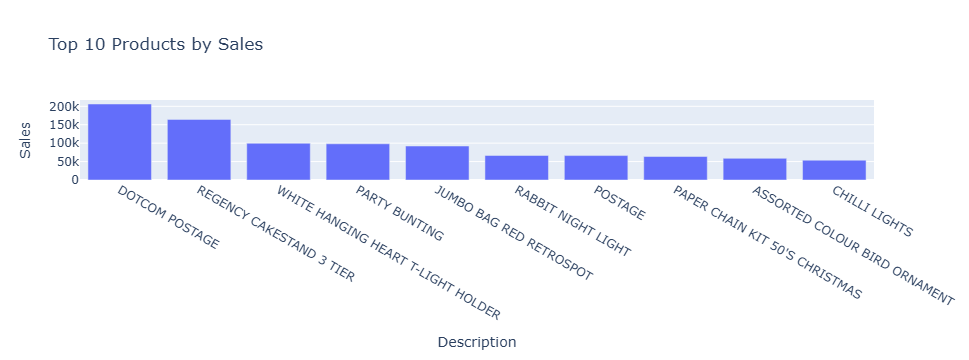

In [99]:
top_10_products = df.groupby('Description')['Sales'].sum().nlargest(10).reset_index()
fig = px.bar(top_10_products, 
             x="Description", 
             y="Sales", 
             title="Top 10 Products by Sales" 
            )

fig.show()
fig.write_html("top_10_products.html")


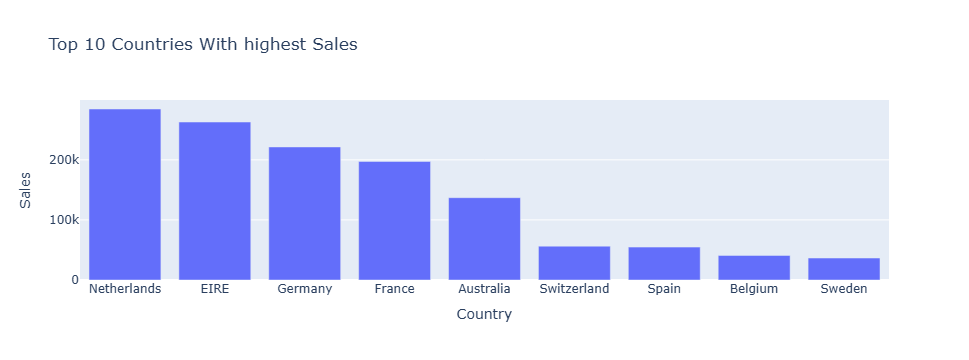

In [100]:
top_country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
top_country_sales = top_country_sales[top_country_sales['Country'] != 'United Kingdom']
fig = px.bar(top_country_sales , x='Country' , y='Sales' , title='Top 10 Countries With highest Sales')
fig.show()
fig.write_html("top_country_sales.html")


In [101]:
yearly_sales = df.groupby(['Year' , 'Month'])['Sales'].sum().reset_index()
yearly_sales['YearMonth'] = pd.to_datetime(yearly_sales[['Year' , 'Month']].assign(DAY=1))
fig = px.line(yearly_sales , x='YearMonth' , y='Sales' , markers = True , title='Monthly Sales Trend')
fig.write_html("yearly_sales.html")


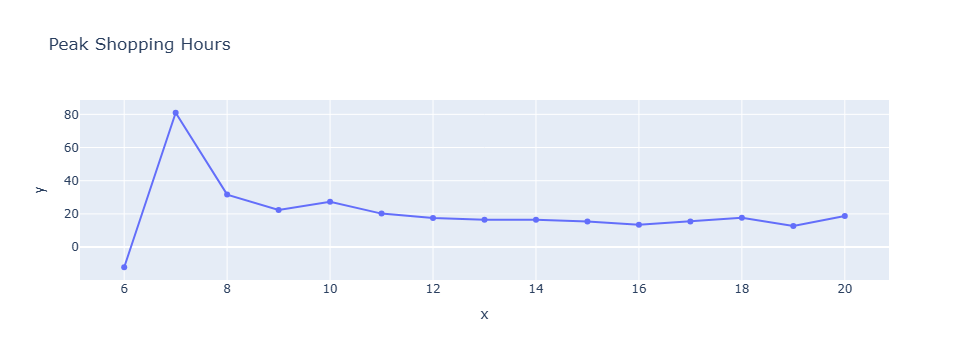

In [104]:
peakhour = df.groupby('Hour')['Sales'].mean().reset_index()
fig = px.line(x=peakhour['Hour'] , y=peakhour['Sales'] , markers=True , title='Peak Shopping Hours')
fig.write_html("peakhour.html")
fig.show()

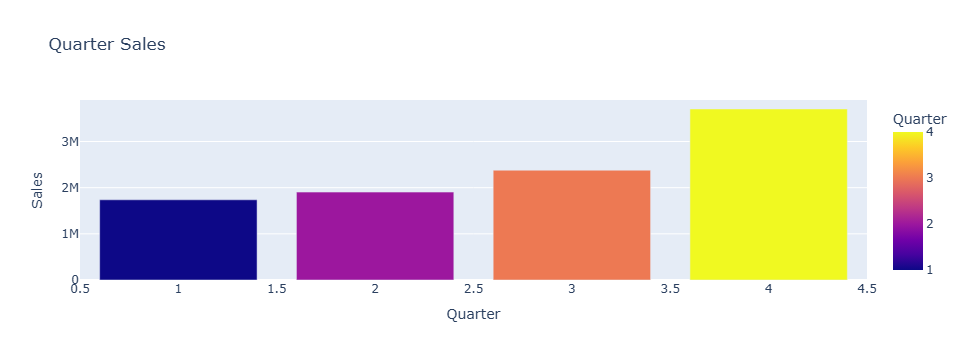

In [105]:
quarter_sale = df.groupby('Quarter')['Sales'].sum().reset_index()
fig = px.bar(quarter_sale , x='Quarter' , y='Sales' , title='Quarter Sales' , color='Quarter')
fig.write_html("quarter_sale.html")
fig.show()

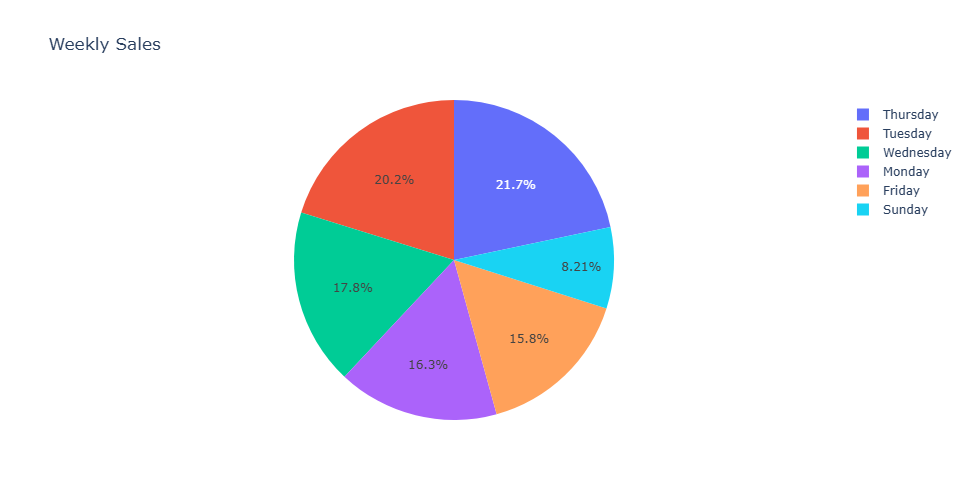

In [106]:
weekly_sales = df.groupby('DayOfWeek')['Sales'].sum().reset_index()
fig = px.pie(weekly_sales ,names='DayOfWeek' , values='Sales' , title='Weekly Sales')
fig.update_layout(width=800, height=500)
fig.write_html("weekly_sales.html")

fig.show()


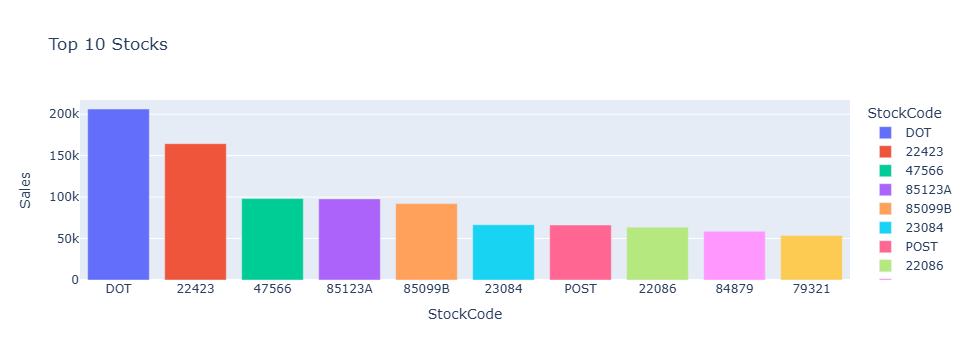

In [107]:
top_10_stocks = df.groupby('StockCode')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_10_stocks , x='StockCode' , y='Sales' , title='Top 10 Stocks' , color='StockCode')
fig.write_html("top_10_stocks.html")
fig.show()

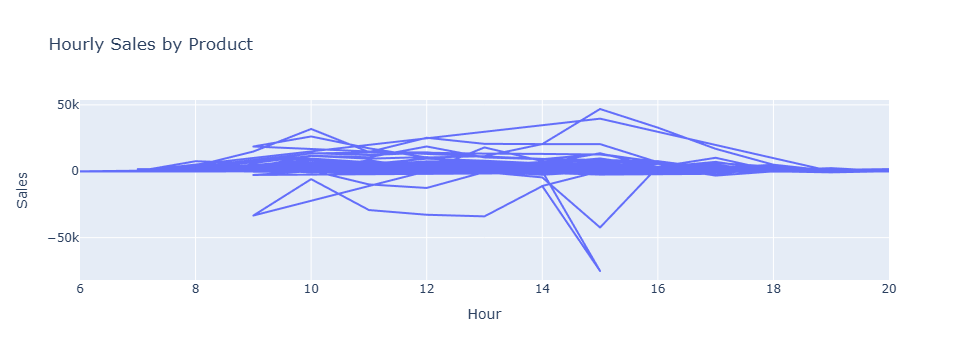

In [111]:
product_sales = df.groupby(["Description", "Hour"])["Sales"].sum().reset_index()

# Initial chart for one product
fig = px.line(product_sales,
              x="Hour", y="Sales", title="Hourly Sales by Product")
fig.write_html("product_sales.html")

fig.show()

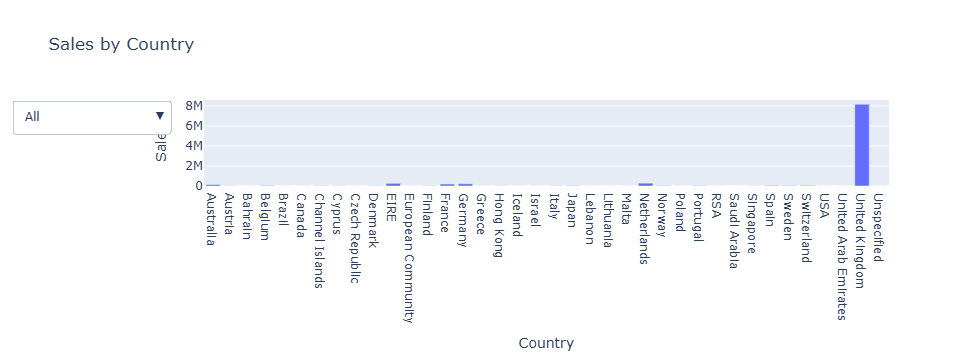

In [114]:

# Group sales by country
country_sales = df.groupby("Country")["Sales"].sum().reset_index()

# Create base bar chart
fig = px.bar(country_sales, x="Country", y="Sales", title="Sales by Country")

# Add dropdown for filtering
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="All",
                     method="update",
                     args=[{"visible": [True]}]),

                dict(label="Top 5 Countries",
                     method="update",
                     args=[{"x": [country_sales.nlargest(5, "Sales")["Country"]],
                            "y": [country_sales.nlargest(5, "Sales")["Sales"]]}]),
                
                dict(label="Bottom 5 Countries",
                     method="update",
                     args=[{"x": [country_sales.nsmallest(5, "Sales")["Country"]],
                            "y": [country_sales.nsmallest(5, "Sales")["Sales"]]}])
            ]),
            direction="down",
            showactive=True
        )
    ]
)
fig.write_html("country_sales.html")
fig.show()


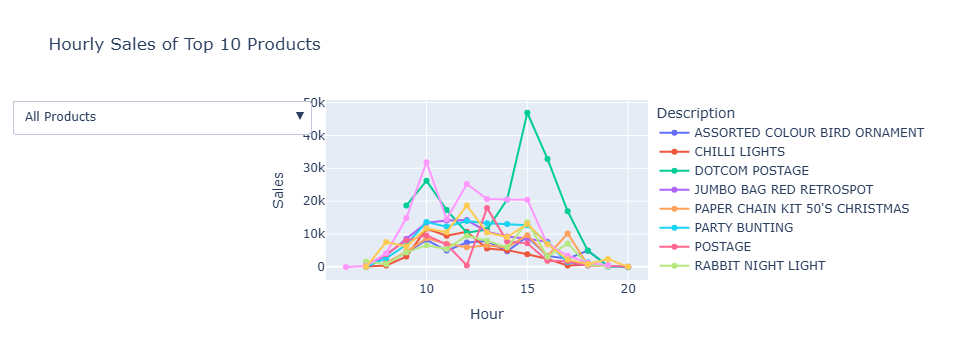

In [115]:
import plotly.express as px

# Top 5 products
top_products = (
    df.groupby("Description")["Sales"]
      .sum()
      .nlargest(10)
      .index
)

product_sales = df[df["Description"].isin(top_products)]
product_sales = (
    product_sales.groupby(["Description", "Hour"])["Sales"]
    .sum()
    .reset_index()
)

# Initial chart (all products shown)
fig = px.line(
    product_sales,
    x="Hour",
    y="Sales",
    color="Description",
    title="Hourly Sales of Top 10 Products",
    markers=True
)

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="All Products",
                     method="update",
                     args=[{"visible": [True] * len(top_products)}]),

                *[
                    dict(label=prod,
                         method="update",
                         args=[{"visible": [i == j for j in range(len(top_products))]}])
                    for i, prod in enumerate(top_products)
                ]
            ],
            direction="down",
            showactive=True
        )
    ]
)
fig.write_html("product_sales.html")
fig.show()


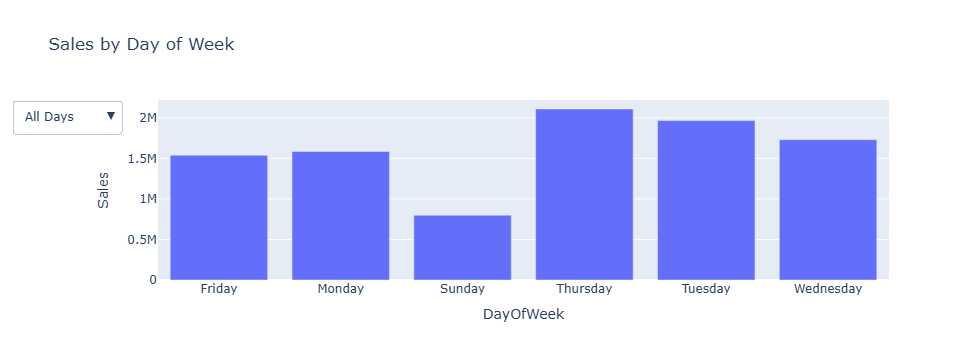

In [116]:

# Group sales by DayOfWeek
dayofweek = df.groupby('DayOfWeek')['Sales'].sum().reset_index()

# Initial line chart
fig = px.bar(dayofweek, x='DayOfWeek', y='Sales', title="Sales by Day of Week")

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                # Show all days
                dict(label="All Days",
                     method="update",
                     args=[{"x": [dayofweek["DayOfWeek"]],
                            "y": [dayofweek["Sales"]]}]),
                
                # Show only Monday
                dict(label="Monday",
                     method="update",
                     args=[{"x": [["Monday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Monday"]["Sales"]]}]),
                
                # Show only Friday (example extra)
                dict(label="Friday",
                     method="update",
                     args=[{"x": [["Friday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Friday"]["Sales"]]}]),
                 dict(label="Sunday",
                     method="update",
                     args=[{"x": [["Sunday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Sunday"]["Sales"]]}]),
                 dict(label="Wednesday",
                     method="update",
                     args=[{"x": [["Wednesday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Wednesday"]["Sales"]]}]),
                 dict(label="Tuesday",
                     method="update",
                     args=[{"x": [["Tuesday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Tuesday"]["Sales"]]}]),
                
                dict(label="Thursday",
                     method="update",
                     args=[{"x": [["Thursday"]],
                            "y": [dayofweek[dayofweek["DayOfWeek"]=="Thursday"]["Sales"]]}]),
            ],
            direction="down",
            showactive=True
        )
    ]
)
fig.write_html("dayofweek.html")
fig.show()
